In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importar librerias 
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Cargar datos de titanic
titanic = sns.load_dataset('titanic')
feature_names = ['survived','pclass','sex','age','sibsp','parch','fare','embarked','class','who','adult_male','deck','embark_town','alive	alone']
# Eliminar las variables que no se utilizarán en el análisis:
titanic = titanic.drop(['alive', 'class', 'who', 'deck', 'embark_town', 'adult_male'], axis=1)
# Convertir las variables categóricas en variables numéricas 
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'])
# Mostrar los 5 primeros
titanic.head()  

,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,1


In [ ]:
#Verificar la información del dataset
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         714 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   alone       891 non-null    bool   
 7   sex_female  891 non-null    uint8  
 8   sex_male    891 non-null    uint8  
 9   embarked_C  891 non-null    uint8  
 10  embarked_Q  891 non-null    uint8  
 11  embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB
None


In [ ]:
#Verificar si existen valores faltantes en el dataset:
print(titanic.isnull().sum())

survived        0
pclass          0
age           177
sibsp           0
parch           0
fare            0
alone           0
sex_female      0
sex_male        0
embarked_C      0
embarked_Q      0
embarked_S      0
dtype: int64


In [ ]:
#Eliminar las filas que contienen valores faltantes
titanic.dropna()
titanic.head()


,survived,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,False,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,True,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,False,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,True,0,1,0,0,1


In [ ]:
#Imputar los valores faltantes utilizando la media de la columna
imputer = SimpleImputer(strategy='mean')
titanic[['age']] = imputer.fit_transform(titanic[['age']])

In [ ]:
# Obtiene conteo de instancias por clase de la data original (class 0 = no diabetes, clase 1 = diabetes)
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
# separa atributos del target 
array = titanic.values
X = titanic.drop(['survived'], axis=1)
y = titanic['survived']

In [ ]:
# Oversampling de la clase minoritaria con SMOTE para balancear los datos
sm = SMOTE(k_neighbors=5)
X_sm, y_sm = sm.fit_resample(X, y)
print('Distribucion de la variable target sobresampleada con SMOTE:', Counter(y_sm) )

Distribucion de la variable target sobresampleada con SMOTE: Counter({0: 549, 1: 549})


In [ ]:
# Otra forma de ver que este balanceada
print(y_sm.value_counts())

0    549
1    549
Name: survived, dtype: int64


In [ ]:
#Dividir el dataset en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,pclass,age,sibsp,parch,fare,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
331,1,45.500000,0,0,28.5000,True,0,1,0,0,1
733,2,23.000000,0,0,13.0000,True,0,1,0,0,1
382,3,32.000000,0,0,7.9250,True,0,1,0,0,1
704,3,26.000000,1,0,7.8542,False,0,1,0,0,1
813,3,6.000000,4,2,31.2750,False,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,7.6500,True,1,0,0,0,1
270,1,29.699118,0,0,31.0000,True,0,1,0,0,1
860,3,41.000000,2,0,14.1083,False,0,1,0,0,1
435,1,14.000000,1,2,120.0000,False,1,0,0,0,1


In [ ]:
#Entrenar el modelo con regrecion logistica:
dt_model = LogisticRegression()
dt_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Realizar predicciones en el conjunto de prueba:
y_pred = dt_model.predict(X_test)

In [ ]:
#Evaluar la precisión del modelo:
accuracy = accuracy_score(y_test, y_pred)
print('Precision:', accuracy)


Precision: 0.7988826815642458


In [ ]:
#Evaluar la precisión del modelo:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.885


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


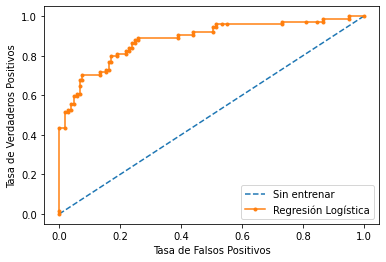

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# Predecimos las probabilidades
lr_probs = model.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

# En conclucion, al entrenar y balancear la data, se espera obtener un modelo más preciso y confiable que pueda predecir con mayor precisión las clases minoritarias y, por lo tanto, ser más útil en aplicaciones prácticas y en la anterior data se veia menos precisa y por lo tanto se tendria que hacer una evaluacion denuevo y entrenar la data para que sea ahun mas precisa y de su aporte en las practicaso proceso dado.